# 데이터 수집 및 RandomForestRegressor & EDA를 통한 변수 선택

# 경제지표 데이터란?

- 수집목적
    - 다양한 경제지표들을 비교
    - 여러 지표들이 기준금리에 미치는 영향을 파악
    - 미래 기준금리 추세 예측에 사용

- 데이터의 수집 기간
    - 2003-01-01 ~ 2023-09-01
    - (249, 68) 로 이루어져있는 데이터프레임


# 라이브러리 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fredpy # fredpy data 준비

In [ ]:
# 코랩 환경 한글 글꼴 설치, 설치 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 경로에 따라 변경
fontprop = fm.FontProperties(fname=font_path, size=12)

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm


# fred api 설정
import fredpy as fp
from datetime import datetime, timedelta
fp.api_key = '발급받은_api키_입력 '


import seaborn as sns
import re

# 경고무시
import warnings

# 글꼴 설정
plt.rc('font', family='NanumGothic')
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 폰트 깨짐 방지

%matplotlib inline

# [0] 데이터

## 데이터 수집

1. FRED API 이용 데이터

    - 원달러환율
    - 달러인덱스
    - 미_국채_2/5/10/20년물
    - 미_경기침체데이터
    - 미_실업률
    - 미_CPI(basic/mom/yoy)
    - 미_CORECPI(basic/mom/yoy)
    - 미_기준금리
    - https://fred.stlouisfed.org/docs/api/fred/


2. 경기종합지수

    - 선행종합지수/취업자수/CP유통수익률...등
    - KOSIS 통계자료 활용
    - https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAA904_OECD

3. GDP

    - 국내총생산
    - 1인당 국내총생산
    - GDP 성장률(%)
    - https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=2736


4. 기준금리/ESI/BSI/CSI... 등

    - 한국은행 경제통계시스템
    - https://ecos.bok.or.kr/#/SearchStat

5. EPU

    - 뉴스 속 Economic , Policy, Uncertainty  단어 출현 빈도
    - https://eiec.kdi.re.kr/bigdata/index.do

## 데이터 합치기

In [ ]:
# fred 데이터 준비
# wondata : 'DEXKOUS', dollar : 'DTWEXBGS'
# enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')
# won= fp.series('DEXKOUS',enddate)
# won.data

# enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')
# dol= fp.series('DTWEXBGS',enddate)
# dol.data


# startdate='2003-01-01'
# enddate='2023-11-01'
# df1 = fp.series('FEDFUNDS',enddate)
# df1=df1.data.loc[(df1.data.index>=startdate) & (df1.data.index<=enddate)]

# df1 = df1.to_frame()
# df1.reset_index(inplace=True)
# df1.rename(columns={'value':'미_금리'})

In [ ]:
# # 미국채_2, _5, _10, _20
# dgs2 = fp.series('DGS2',enddate)
# df2y=dgs2.data.loc[(dgs2.data.index>=startdate) & (dgs2.data.index<=enddate)]

# dgs5 = fp.series('DGS5',enddate)
# df5y=dgs5.data.loc[(dgs5.data.index>=startdate) & (dgs5.data.index<=enddate)]

# dgs10 = fp.series('DGS10',enddate)
# df10y=dgs10.data.loc[(dgs10.data.index>=startdate) & (dgs10.data.index<=enddate)]

# dgs20 = fp.series('DGS20',enddate)
# df20y=dgs20.data.loc[(dgs20.data.index>=startdate) & (dgs20.data.index<=enddate)]

# df2y = df2y.to_frame()
# df2y.reset_index(inplace=True)
# df2y.rename(columns={'value':'미국채_2'})

# df5y = df5y.to_frame()
# df5y.reset_index(inplace=True)
# df5y.rename(columns={'value':'미국채_5'})

# df10y = df10y.to_frame()
# df10y.reset_index(inplace=True)
# df10y.rename(columns={'value':'미국채_10'})

# df20y = df20y.to_frame()
# df20y.reset_index(inplace=True)
# df20y.rename(columns={'value':'미국채_20'})

# df2y['날짜'] = df2y['date'].astype(str)
# df2y['날짜'] = df2y['날짜'].apply(lambda x: "-".join(x.split('-')[:2]))
# m_2 = df2y.groupby('날짜')['value'].mean()

# df5y['날짜'] = df5y['date'].astype(str)
# df5y['날짜'] = df5y['날짜'].apply(lambda x: "-".join(x.split('-')[:2]))
# m_5 = df5y.groupby('날짜')['value'].mean()

# df10y['날짜'] = df10y['date'].astype(str)
# df10y['날짜'] = df10y['날짜'].apply(lambda x: "-".join(x.split('-')[:2]))
# m_10 = df10y.groupby('날짜')['value'].mean()

# df20y['날짜'] = df20y['date'].astype(str)
# df20y['날짜'] = df20y['날짜'].apply(lambda x: "-".join(x.split('-')[:2]))
# m_20 = df20y.groupby('날짜')['value'].mean()

# final_m = pd.concat([m_2, m_5,m_10,m_20 ], axis=1)
# final = final_m.reset_index()
# final['날짜'] = pd.to_datetime(final['날짜'])
# final.rename(columns={'날짜':'date'}, inplace=True)
# final2 = final.iloc[:-1,:]

# a = pd.merge(df1,final2,how="outer",on='date')
# fname = ['날짜','미_금리','미국채_2','미국채_5','미국채_10','미국채_20']
# a.columns = fname

# a['날짜'] = a['날짜'].astype(str)

# df = pd.read_csv('/content/drive/MyDrive/경제지표데이터/finance_62_final.csv')
# fff = pd.merge(df, a, how='outer',on='날짜')
# fff.to_csv('final_68.csv', encoding='utf-8-sig', index=False)

In [ ]:
# from datetime import datetime, timedelta
# enddate='2023-10-01'
# u = fp.series('UNRATE',enddate)


# # 달러인덱스
# dol = pd.DataFrame(dol.data)
# dol = dol.reset_index()
# dol['date_str'] = dol['date'].astype(str)
# dol['month'] = dol['date_str'].apply(lambda x : "-".join(x.split('-')[:2]))
# means = dol.groupby('month')['value'].mean()
# means = means.reset_index()
# means['month'] = pd.to_datetime(means['month'])
# means.set_index('month', inplace=True)

# # 경기침체데이터
# usreg = fp.series('USREC',enddate)
# usregdata=usreg.data.loc[usreg.data.index>='2003-01-01']
# usregdata = pd.DataFrame(usregdata)

# # 실업률 데이터
# udata=u.data.loc[u.data.index>='2003-01-01']
# udata = pd.DataFrame(udata)

# # cpi(소비자물가지수)
# enddate=(datetime.now() + timedelta(days=-1)).strftime('%Y-%m-%d')
# cpi= fp.series('CPIAUCSL',enddate)
# cpi_real = pd.DataFrame(cpi.data)

# # mom(지난달대비성장)
# cpimom=cpi.data.pct_change()*100
# cpimom = cpimom.loc[cpimom.index>='2003-01-01']
# cpimom = pd.DataFrame(cpimom)

# # yoy(지난연도대비성장)
# cpiyoy = cpi.apc().data
# cpiyoy = cpiyoy.loc[cpiyoy.index>='2003-01-01']
# cpiyoy = pd.DataFrame(cpiyoy)

# # corecpi
# corecpi = fp.series('CPILFESL',enddate)
# corecpi_real = cpi.data.loc[cpi.data.index>='2003-01-01']
# corecpi_real = pd.DataFrame(cpi_real)

# # yoy corecpi
# corecpiyoy=corecpi.apc().data
# corecpiyoy_real = corecpiyoy.loc[corecpiyoy.index>='2003-01-01']
# corecpiyoy_real = pd.DataFrame(corecpiyoy_real)

# # mom corecpi
# corecpimom=corecpi.data.pct_change()*100
# corecpimom_real = corecpimom.loc[corecpimom.index>='2003-01-01']
# corecpimom_real = pd.DataFrame(corecpimom_real)

In [ ]:
# fred = pd.concat([means, usregdata,udata,cpi_real, cpimom,cpiyoy, corecpi_real, corecpiyoy_real, corecpimom_real ], axis=1)
# col_fred = ['달러인덱스','미_경기침체데이터','미_실업률','미_cpi','미_mom','미_yoy','미_corecpi','미_coremom','미_coreyoy']
# fred.columns = col_fred

# fred = fred.loc[fred.index>='2003-01-01']
# fred

# final_df = pd.concat([df_finance, fred ], axis=1)
# final_df
# final_df.reset_index(inplace=True)
# final_df.to_csv('final_finance_data.csv', encoding='utf-8-sig', index=False)

In [ ]:
# df1 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/시장금리(월,분기,년)_22101413.xlsx')
# df2 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/EPU지수.xlsx')
# df1['날짜'] = df1['날짜'].apply(lambda x: x.replace('/','-'))
# df1['날짜'] = pd.to_datetime(df1['날짜'])
# df2['Year'] = df2['Year'].astype(str)
# df2['Month'] = df2['Month'].astype(str)
# df2['날짜'] = df2['Year']+'-'+df2['Month']
# df2 = df2.loc[:,['날짜','South Korea','Korea Text','United States of America','US Text']]
# df2['날짜'] = pd.to_datetime(df2['날짜'])
# df2['날짜'] = df2['날짜'].astype(str)
# df_f = pd.read_csv('/content/drive/MyDrive/경제지표데이터/final_finance_data.csv')
# final = pd.merge(df_f, df1, how='outer', on='날짜')
# final2 = pd.merge(final, df2, how='outer', on='날짜')
# final2
# move = pd.read_excel('/content/drive/MyDrive/경제지표데이터/변동치.xlsx')
# move['날짜'] = pd.to_datetime(move['날짜'])
# move['날짜'] = move['날짜'].astype(str)
# final3 = pd.merge(final2, move, how='outer', on='날짜')
# final3.drop(['연도','월'], inplace=True, axis=1)
# final3.to_csv('final_finance_data_ff.csv', encoding='utf-8-sig', index=False)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/경제지표데이터/final_finance_data.csv')
# df1 = pd.read_csv('/content/drive/MyDrive/경제지표데이터/경제심리지표_한국은행/뉴스심리지수_월별.csv')
# df1['날짜'] = df1['변환'].apply(lambda x:x.replace('/','-'))
# df1.drop('변환', inplace=True, axis=1)
# df1 = df1.iloc[:-2,:]

# df2 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/경제심리지표_한국은행/기업경기실사지수 업황실적BSI.xlsx')
# df3 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/경제심리지표_한국은행/소비자동향지수/현재경기판단 및 향후경기전망CSI.xlsx')
# df4 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/경제심리지표_한국은행/소비자동향지수/현재생활형편 및 생활형편전망CSI.xlsx')
# df5 = pd.read_excel('/content/drive/MyDrive/경제지표데이터/경제심리지표_한국은행/소비자심리지수(CCSI).xlsx')
# final1 = pd.merge(df2, df1, how='outer', on='날짜')
# final2 = pd.merge(final1, df3, how='outer', on='날짜')
# final3 = pd.merge(final2, df4, how='outer', on='날짜')
# c_final3 = pd.merge(final3, df5, how='outer', on='날짜')
# # a = pd.to_datetime(c_final3['날짜'])
# # c_final3['날짜'] = a.astype(str)
# a = pd.to_datetime(c_final3['날짜'])
# c_final3['날짜'] = a.astype(str)
# df = df.iloc[:-2,:]
# final4 = pd.merge(df, c_final3, how='outer', on='날짜')
# final4.to_csv('finance_62_final.csv', encoding='utf-8-sig', index=False)

## 결측값 채워넣기

- 기간별 결측치 데이터

    **---- 2023/01 ~ 2023/09 결측 ------**  
    국내총생산(GDP)(당해년 가격) (10억원) -3  
    : 분기 데이터 찾음 23년 2분기까지 채움  
    1인당 GDP(당해년 가격) (만원) -9  
    : 단위 만원으로 변경  
    https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=2736

    **----- 2003년 ~ 2005년 결측 -----**  
    달러인덱스 -36  
    : 추가 데이터 찾음  
    참고 자료 : https://kr.investing.com/currencies/us-dollar-index-historical-data

    **----- 2003년 ~ 2013년**  
    South Korea -120  
    : 추가 데이터 찾음
    https://www.policyuncertainty.com/korea_bbd.html

    Korea Text -243  
    : 데이터 미사용

    **----- ~2013/1 결측**    
    United States of America -121  
    US Text -245  
    : 데이터 미사용

    **---- 2003년 ~ 2004년 결측**  
    뉴스심리지수 -24  
    : df.fillna(method='ffill')  
    앞의 데이터로 채움

    **----- 2003/01 ~ 2008/06 결측----**  
    현재경기판단 -66  
    현재생활형편 -66  
    소비자심리지수(CCSI) -66  
    
    : 분기 별 데이터 찾음  
    https://ecos.bok.or.kr/#/SearchStat


## 데이터 로드

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ASAC/최종프로젝트/finance_final_68.csv')
df

,날짜,선행종합지수(2020=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2020=100),...,뉴스심리지수,현재경기판단,현재생활형편,소비자심리지수(CCSI),up_down,미_금리,미국채_2,미국채_5,미국채_10,미국채_20
0,2003-01-01,53.7,-0.4,101.4,90.1,8145.7,148.2,604.9,0.99,57.8,...,106.39,82,87,97.0,1,1.24,1.743333,3.052381,4.048571,5.021905
1,2003-02-01,53.7,-0.9,100.1,88.8,8048.8,148.9,595.1,0.84,57.7,...,106.39,82,87,97.0,1,1.26,1.627895,2.897895,3.902632,4.870000
2,2003-03-01,53.8,-1.8,98.5,87.6,7904.5,149.7,591.1,0.72,57.7,...,106.39,82,87,97.0,1,1.25,1.573810,2.783810,3.807143,4.816190
3,2003-04-01,53.7,-6.2,97.5,86.3,7858.6,150.3,576.1,0.61,57.6,...,106.39,71,45,91.0,0,1.26,1.622381,2.928571,3.958571,4.911905
4,2003-05-01,53.7,-8.5,95.5,85.4,7624.8,151.2,583.4,0.53,57.8,...,106.39,71,45,91.0,1,1.26,1.415238,2.515714,3.569048,4.521429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,109.8,-17.2,93.2,99.9,10466.3,84.5,2488.4,-0.15,110.3,...,96.52,64,88,98.0,1,5.06,4.131818,3.591364,3.573636,3.963636
245,2023-06-01,110.5,-13.0,94.6,99.0,11826.5,86.0,2548.9,-0.16,110.3,...,101.64,69,89,100.7,1,5.08,4.639524,3.949524,3.748095,4.041905
246,2023-07-01,111.1,-9.6,94.7,99.3,12177.8,86.6,2572.6,-0.04,110.0,...,102.08,75,91,103.2,1,5.12,4.828500,4.141500,3.899500,4.149500
247,2023-08-01,111.4,-7.9,94.6,98.4,9882.9,86.8,2585.1,0.12,110.0,...,99.03,72,91,103.1,1,5.33,4.901739,4.306522,4.167826,4.456522


# [1] 전처리

In [ ]:
# 결측치처리 & up_down변수,Text변수 제외
df_notcat = df.drop(['Korea Text', 'US Text','up_down'], axis=1)
df_notcat = df_notcat.fillna(method = 'bfill').fillna(method = 'ffill')

In [ ]:
# 경제위기, 미_경기침체데이터 타입 변환
df_notcat['경제위기']=df_notcat['경제위기'].astype(object)
df_notcat['미_경기침체데이터']=df_notcat['미_경기침체데이터'].astype(object)

In [ ]:
df_notcat.set_index('날짜', inplace=True)
df_notcat

,선행종합지수(2020=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2020=100),광공업생산지수(2020=100),...,BSI_비제조업,뉴스심리지수,현재경기판단,현재생활형편,소비자심리지수(CCSI),미_금리,미국채_2,미국채_5,미국채_10,미국채_20
날짜,,,,,,,,,,,,,,,,,,,,,
2003-01-01,53.7,-0.4,101.4,90.1,8145.7,148.2,604.9,0.99,57.8,51.6,...,80,106.39,82,87,97.0,1.24,1.743333,3.052381,4.048571,5.021905
2003-02-01,53.7,-0.9,100.1,88.8,8048.8,148.9,595.1,0.84,57.7,51.7,...,71,106.39,82,87,97.0,1.26,1.627895,2.897895,3.902632,4.870000
2003-03-01,53.8,-1.8,98.5,87.6,7904.5,149.7,591.1,0.72,57.7,51.8,...,68,106.39,82,87,97.0,1.25,1.573810,2.783810,3.807143,4.816190
2003-04-01,53.7,-6.2,97.5,86.3,7858.6,150.3,576.1,0.61,57.6,51.9,...,72,106.39,71,45,91.0,1.26,1.622381,2.928571,3.958571,4.911905
2003-05-01,53.7,-8.5,95.5,85.4,7624.8,151.2,583.4,0.53,57.8,51.9,...,71,106.39,71,45,91.0,1.26,1.415238,2.515714,3.569048,4.521429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,109.8,-17.2,93.2,99.9,10466.3,84.5,2488.4,-0.15,110.3,104.4,...,78,96.52,64,88,98.0,5.06,4.131818,3.591364,3.573636,3.963636
2023-06-01,110.5,-13.0,94.6,99.0,11826.5,86.0,2548.9,-0.16,110.3,104.7,...,77,101.64,69,89,100.7,5.08,4.639524,3.949524,3.748095,4.041905
2023-07-01,111.1,-9.6,94.7,99.3,12177.8,86.6,2572.6,-0.04,110.0,104.5,...,76,102.08,75,91,103.2,5.12,4.828500,4.141500,3.899500,4.149500


## 변수 확인

- %로 표현된 변수
        '소비자물가지수변화율(서비스)','실업률총계', '실_15-19세', '실_20-29세', '실_30-39세', '실_40-49세','실_50-59세', '실_60세이상',
        '미_실업률', '미_mom', '미_yoy', ' '미_coremom', '미_coreyoy', '콜금리','미_금리',
        '미국채_2', '미국채_5', '미국채_10', '미국채_20',
        '재고순환지표(%p)', '장단기금리차(%p)',  'CP유통수익률(%p)', 'GDP 성장률 (%)'

- 100 기준
    - (기준년도=100)으로 표현된 변수
            '선행종합지수(2020=100)','기계류내수출하지수(선박제외)(2020=100)', '수출입물가비율(2015=100)',
             '코스피(1980.1.4=100)','동행종합지수(2020=100)', '광공업생산지수(2020=100)','서비스업생산지수(도소매업제외)(2020=100)',  
            '소매판매액지수(2020=100)', '내수출하지수(2020=100)',  '후행종합지수(2020=100)','생산자제품재고지수(2020=100)'
    - 100이 기준점인 변수
            '경제심리지수', '소비자물가지수', '농산물및석유류제외지수', '식료품 및 에너지제외 지수', 'BSI_전산업', 'BSI_제조업', 'BSI_비제조업', '소비자심리지수(CCSI)', '현재경기판단',
            '현재생활형편', '뉴스심리지수', '원달러환율', '동행지수순환변동치', '선행지수순환변동치','달러인덱스'
         
- 금액
         '건설수주액(실질)(십억원)', '건설기성액(실질)(십억원)','수입액(실질)(백만불)',
         '소비재수입액(실질)(백만불)', '국내총생산(GDP)(당해년 가격) (10억원\)', '1인당 GDP(당해년 가격) (만원)'
- 인원수
        '비농림어업취업자수(천명)','취업자수(천명)'
       ,'미_cpi','미_corecpi', 'South Korea', 'United States of America'

# [2] RandomForestRegressor

In [ ]:
# 랜덤포레스트 회귀
X_data = df_notcat[df_notcat.drop(['기준금리'],axis=1).columns]
y_data = df_notcat[['기준금리']]

In [ ]:
X_data.columns

Index(['선행종합지수(2020=100)', '재고순환지표(%p)', '경제심리지수', '기계류내수출하지수(선박제외)(2020=100)',
       '건설수주액(실질)(십억원)', '수출입물가비율(2015=100)', '코스피(1980.1.4=100)',
       '장단기금리차(%p)', '동행종합지수(2020=100)', '광공업생산지수(2020=100)',
       '서비스업생산지수(도소매업제외)(2020=100)', '건설기성액(실질)(십억원)', '소매판매액지수(2020=100)',
       '내수출하지수(2020=100)', '수입액(실질)(백만불)', '비농림어업취업자수(천명)', '후행종합지수(2020=100)',
       '생산자제품재고지수(2020=100)', '소비자물가지수변화율(서비스)', '소비재수입액(실질)(백만불)', '취업자수(천명)',
       'CP유통수익률(%p)', '실업률총계', '실_15-19세', '실_20-29세', '실_30-39세', '실_40-49세',
       '실_50-59세', '실_60세이상', '경제위기', '국내총생산(GDP)(당해년 가격) (10억원\)',
       '1인당 GDP(당해년 가격) (만원)', 'GDP 성장률 (%)', '소비자물가지수', '농산물및석유류제외지수',
       '식료품 및 에너지제외 지수', '원달러환율', '달러인덱스', '미_경기침체데이터', '미_실업률', '미_cpi',
       '미_mom', '미_yoy', '미_corecpi', '미_coremom', '미_coreyoy', '콜금리',
       'South Korea', 'United States of America', '동행지수순환변동치', '선행지수순환변동치',
       'BSI_전산업', 'BSI_제조업', 'BSI_비제조업', '뉴스심리지수', '현재경기판단', '현재생활형편',
       '소비자심리지수(CCSI)', '미_금리', '미국채_2', '미국

In [ ]:
y_data

,기준금리
날짜,
2003-01-01,4.25
2003-02-01,4.25
2003-03-01,4.25
2003-04-01,4.25
2003-05-01,4.00
...,...
2023-05-01,3.50
2023-06-01,3.50
2023-07-01,3.50


### 2-1 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size=0.3, random_state=123)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val,y_tr, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=123)

## 2-2 스케일링
-  %(기준금리와 동일단위)로 표현된 변수(23개) & (경제위기, 미_경기침체 - 0,1로 구성)      
  제외하고 스케일링

In [ ]:
col_notper = [
        #100기준
        '경제심리지수', '소비자물가지수', '농산물및석유류제외지수', '식료품 및 에너지제외 지수', 'BSI_전산업', 'BSI_제조업', 'BSI_비제조업', '소비자심리지수(CCSI)', '현재경기판단',
        '현재생활형편', '뉴스심리지수', '원달러환율', '동행지수순환변동치', '선행지수순환변동치','달러인덱스'
         ,'선행종합지수(2020=100)','기계류내수출하지수(선박제외)(2020=100)','수출입물가비율(2015=100)', '코스피(1980.1.4=100)', '동행종합지수(2020=100)', '광공업생산지수(2020=100)'
         ,'서비스업생산지수(도소매업제외)(2020=100)', '소매판매액지수(2020=100)', '내수출하지수(2020=100)', '후행종합지수(2020=100)', '생산자제품재고지수(2020=100)'
        # 금액
         ,'건설수주액(실질)(십억원)', '건설기성액(실질)(십억원)','수입액(실질)(백만불)', '소비재수입액(실질)(백만불)', '국내총생산(GDP)(당해년 가격) (10억원\)', '1인당 GDP(당해년 가격) (만원)'
        # 인원수
        ,'비농림어업취업자수(천명)','취업자수(천명)'
       ,'미_cpi','미_corecpi', 'South Korea', 'United States of America'
       ]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tr[col_notper] = scaler.fit_transform(X_tr[col_notper])
X_val[col_notper] = scaler.transform(X_val[col_notper])
X_test[col_notper] = scaler.transform(X_test[col_notper])

In [ ]:
X_tr.head()

,선행종합지수(2020=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2020=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2020=100),광공업생산지수(2020=100),...,BSI_비제조업,뉴스심리지수,현재경기판단,현재생활형편,소비자심리지수(CCSI),미_금리,미국채_2,미국채_5,미국채_10,미국채_20
날짜,,,,,,,,,,,,,,,,,,,,,
2006-06-01,0.124783,1.0,0.877907,0.293814,0.162550,0.511869,0.291867,1.01,0.153700,0.240446,...,0.815789,0.460197,0.771429,0.500000,0.627962,4.99,5.121818,5.067273,5.106364,5.292273
2009-06-01,0.246101,7.3,0.591085,0.252577,0.285995,0.341246,0.299887,2.68,0.269450,0.339172,...,0.736842,0.660605,0.900000,0.857143,0.827014,0.21,1.184091,2.705909,3.721818,4.508636
2021-04-01,0.899480,11.1,0.705426,0.685567,0.840423,0.148368,0.949021,1.01,0.869070,0.893312,...,0.842105,1.000000,0.700000,0.928571,0.706161,0.07,0.163182,0.861818,1.635000,2.197727
2004-02-01,0.045061,4.3,0.790698,0.072165,0.145629,0.948071,0.098645,1.37,0.051233,0.090764,...,0.552632,0.758211,0.642857,0.214286,0.533175,1.01,1.740000,3.067895,4.084211,4.936842
2006-09-01,0.128250,-3.6,0.788760,0.262887,0.417807,0.500000,0.278916,0.50,0.159393,0.240446,...,0.763158,0.669512,0.700000,0.357143,0.509479,5.25,4.769000,4.667500,4.719000,4.927500


## 2-3 모델

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=123)
rfr.fit(X_tr,y_tr)

<ipython-input-18-df80333cb05f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_tr,y_tr)


RandomForestRegressor(random_state=123)

In [ ]:
pred1 = rfr.predict(X_val)
pred1

array([3.5175, 0.5625, 3.7325, 3.8575, 2.09  , 2.77  , 3.5375, 1.4825,
       2.1975, 2.1325, 2.4875, 4.97  , 2.47  , 3.2475, 2.145 , 1.085 ,
       1.71  , 3.2525, 5.07  , 3.25  , 4.575 , 2.44  , 2.0375, 1.025 ,
       1.3075, 4.5025, 3.2425, 2.485 , 1.03  , 2.1325, 4.27  , 2.25  ,
       2.78  , 3.2525, 0.5925, 3.7375, 3.2425, 1.5   , 1.5025, 3.2575,
       1.325 , 3.525 , 0.7125, 1.98  , 2.075 , 3.7325, 4.99  , 2.065 ,
       3.85  , 1.2825, 4.6875, 0.56  , 0.555 ])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
# 평가
mse = mean_squared_error(y_val, pred1)
# RMSE
rmse = np.sqrt(mse)
# 지표값 출력
mse, rmse, r2_score(y_val, pred1)

(0.02279080188679247, 0.15096622763648984, 0.9850896707327724)

In [ ]:
pred = rfr.predict(X_test)
pred

array([2.4775, 2.03  , 2.75  , 4.775 , 3.6275, 2.185 , 3.6225, 2.2475,
       2.76  , 2.035 , 4.99  , 1.26  , 1.0725, 1.71  , 1.115 , 1.495 ,
       1.495 , 1.475 , 2.1075, 3.2475, 2.11  , 2.985 , 0.575 , 3.2575,
       2.4475, 4.3875, 3.5325, 2.4725, 2.44  , 1.25  , 2.1075, 3.8725,
       1.3125, 2.5   , 2.02  , 2.985 , 3.6175, 3.6425, 4.99  , 3.9325,
       4.025 , 3.115 , 1.3075, 0.665 , 3.3225, 1.605 , 0.545 , 4.8625,
       1.68  , 1.925 , 1.2875, 3.245 , 2.7525, 1.285 , 3.735 , 2.4725,
       1.505 , 3.2525, 3.74  , 1.4875, 1.6275, 1.4875, 0.5325, 4.8975,
       1.2775, 2.1425, 3.505 , 3.4625, 1.8375, 1.705 , 1.2625, 0.5375,
       4.65  , 1.655 , 3.5425])

In [ ]:
# 평가
mse = mean_squared_error(y_test, pred)
# RMSE
rmse = np.sqrt(mse)
# 지표값 출력
mse, rmse, r2_score(y_test, pred)

(0.016898750000000008, 0.1299951922187894, 0.9872994780793319)

In [ ]:
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(rfr.feature_importances_, index=df_notcat.drop(['기준금리'],axis=1).columns)
# 내림차순 정렬
top20 = ser.sort_values(ascending=False)[:20]
print(top20)
# 모든 변수 중의 상대적 비율, 수치 높을수록 중요도 크다는 의미

콜금리                     0.846494
CP유통수익률(%p)             0.112149
미국채_2                   0.006513
미국채_10                  0.005275
미국채_5                   0.005247
후행종합지수(2020=100)        0.002876
달러인덱스                   0.001901
선행종합지수(2020=100)        0.001666
식료품 및 에너지제외 지수          0.001407
수입액(실질)(백만불)            0.001287
소매판매액지수(2020=100)       0.001146
농산물및석유류제외지수             0.000916
소비재수입액(실질)(백만불)         0.000751
동행지수순환변동치               0.000719
코스피(1980.1.4=100)       0.000696
수출입물가비율(2015=100)       0.000641
내수출하지수(2020=100)        0.000582
건설수주액(실질)(십억원)          0.000575
미국채_20                  0.000546
1인당 GDP(당해년 가격) (만원)    0.000520
dtype: float64


## 2-4 EDA
- 기준금리와 거시경제지표(65개)간 추이 분석

In [ ]:
def plot_time_series(df, column_number, scale_factor=1.0):
    plot_data = df[['기준금리', df.columns[column_number]]].copy()
    plot_data['날짜'] = df['날짜']

    # 우선 스케일링 방식은 그대로 둔다.
    plot_data['날짜'] = pd.to_datetime(plot_data['날짜'])

    plot_data.iloc[:, 1] *= scale_factor

    # Seaborn Line Plot 그리기
    plt.figure(figsize=(12, 6))

    # 기준금리를 첫 번째 축으로 그리기
    ax1 = plt.gca()
    ax1.plot(plot_data['날짜'], plot_data['기준금리'], label='기준금리', color='red')
    ax1.set_xlabel('날짜')
    ax1.set_ylabel('기준금리', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # 두 번째 축으로 입력 변수 그리기
    ax2 = ax1.twinx()
    ax2.plot(plot_data['날짜'], plot_data.iloc[:, 1], label=f'{plot_data.columns[1]} (scaled)', color='blue')
    ax2.set_ylabel(f'{plot_data.columns[1]} (scaled by {scale_factor})', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title(f'기준금리와 {plot_data.columns[1]}의 추이 분석')

    # 두 개의 변수에 대한 범례 표시
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # scaling 정보 출력
    print(f'Scaling: {plot_data.columns[1]} * {scale_factor}')

    plt.show()

Scaling: 콜금리 * 1


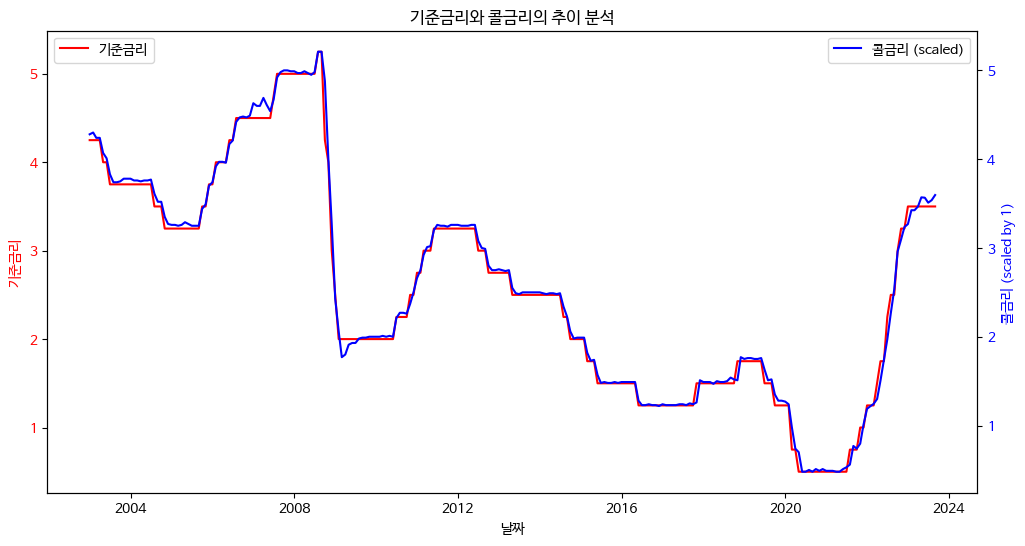

In [ ]:
plot_time_series(eco_num_df, 47, scale_factor=1)

Scaling: CP유통수익률(%p) * 1


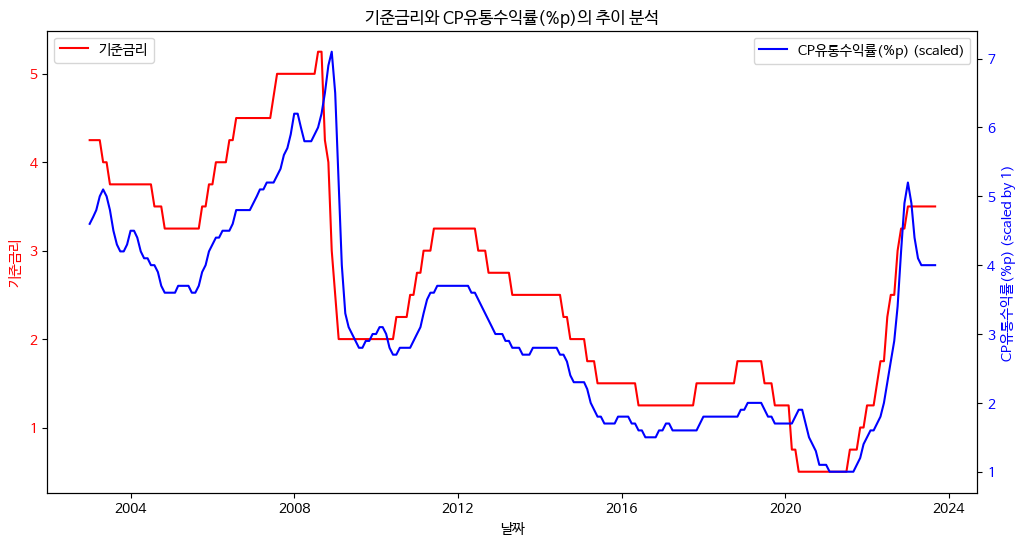

In [ ]:
plot_time_series(eco_num_df, 21, scale_factor=1)

Scaling: 장단기금리차(%p) * 1


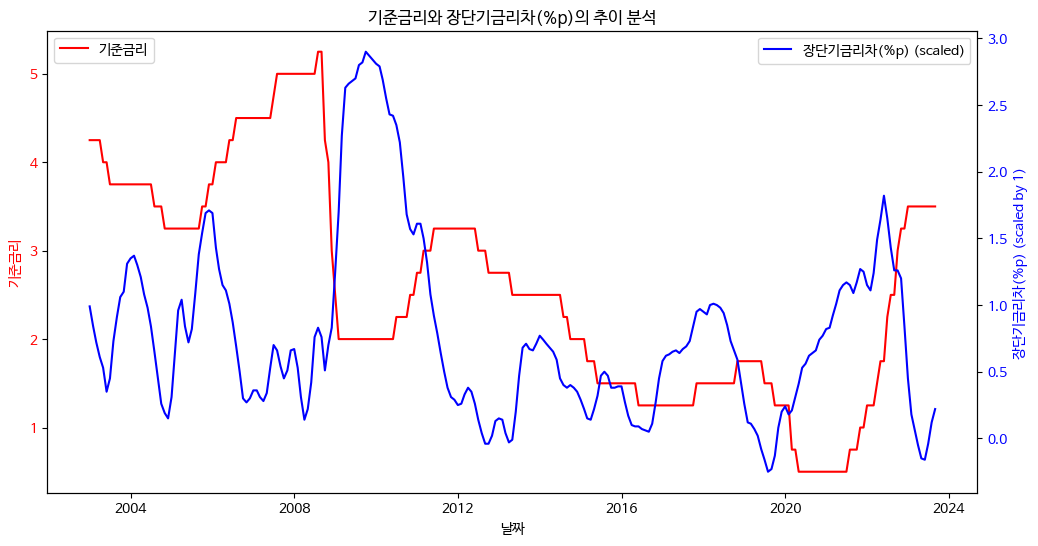

In [ ]:
plot_time_series(eco_num_df, 7, scale_factor=1)

Scaling: 경제심리지수 * 1


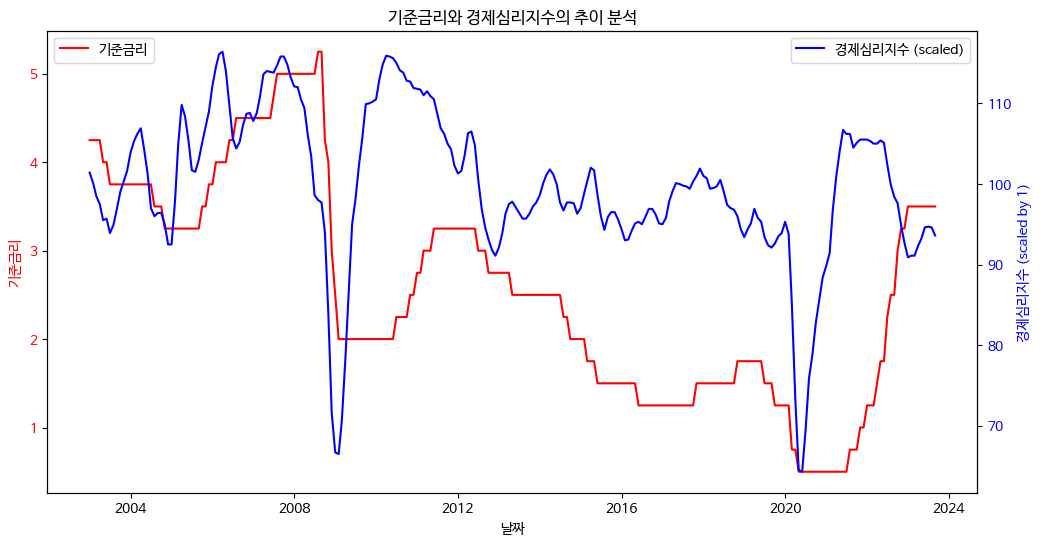

In [ ]:
plot_time_series(eco_num_df, 2, scale_factor=1)

### 결과
- 콜금리, CP유통수익률(%p)
    - 기준금리와 매우 밀접한 관계
    - validation 예측시 과적합 발생 우려, 일반화의 어려움으로 제외
- 장단기금리차(%p), 경제심리지수
    - 랜덤포레스트로 얻은 상위 20개 변수에 속하진 않지만 eda결과 유의한 변수로 대체

## 2-5 최종변수

In [ ]:
# 상위 20개 중요변수 + 종속변수
top20 = ['미국채_2','미국채_5','미국채_10','후행종합지수(2020=100)','달러인덱스','선행종합지수(2020=100)','식료품 및 에너지제외 지수',
        '수입액(실질)(백만불)','소매판매액지수(2020=100)','농산물및석유류제외지수', '소비재수입액(실질)(백만불)', '동행지수순환변동치','코스피(1980.1.4=100)',
          '수출입물가비율(2015=100)','내수출하지수(2020=100)','건설수주액(실질)(십억원)','미국채_20','1인당 GDP(당해년 가격) (만원)','장단기금리차(%p)', '경제심리지수','기준금리' ]

### 최종변수 설명

- 미_국채_2/5/10/20 채권 수익률
    - 미국정부가 돈을 빌리기 위해 발행한 차용증
    - 시장의 분위기를 파악할 수 있는 중요한 지표

- 달러인덱스
    - 세계 주요 6개국 통화에 대비 미국 달러의 평균적인 가치를 나타내는 지표

- 코스피
    - 한국 유가증권시장의 종합주가지수

- 1인당 GDP
    - GDP란 일정 기간(보통 1년) 동안 한 나라 안에서 생산된 모든 재화와 서비스의 시장 가치를 화폐 단위로 환산하여 더한 값
    - GDP를 인구수로 나눈 것

- 선행종합지수/ 후행종합지수
    - 실제 경기순환에 앞서 변화하는 경제지표를 이용해 만든 지수
        - 향후 경기변동의 단기 예측에 이용

    - 재고, 취업자수 등 실제 경기순환에 후행하여 변동하는 개별 지표를 가공, 종합하여 만든 지표
        - 현재 경기의 사후 확인에  이용된다

- 동행지수순환변동치
    - 동행지수에서 과거의 추세를 제거해 현재 경기의 순환만을 보는 것


- 식료품 및 에너지제외 지수/ 농산물 및 석유류제외지수
    - CORE CPI
    - 소비자 물가 지수에서 곡물 이외 농산물과 석유류를 제외한 물가지수
    - OECD 기준의 근원 물가로서 농산물보다 폭넓은 식료품, 석유류보다 폭넓은 에너지 관련 품목을 제외한 물가지수

- 수입액(실질)/ 소비재수입액(실질)
    - 수입액
    - 전체수입액 중 소비재부문의 수입액만을 집계한 것
        - 곡물/ 직접소비재/내구소비재/비내구소비재


- 소매판매액지수
    - 동행종합지수 구성지표, 하나로 소비동향을 파악하기 위해 작성. 상품군별, 소매업태별 등으로 구분하여 작성되며 월별 판매량 변화를 지수화

- 수출입물가비율
    - 수출입상품의 가격동향을 파악하여 가격측면에서의 대외교역조건을 측정

- 내수출하지수
    - 생산자제품출하지수 중 국내 생산 및 국내 판매하는 정도를 나타내는 지수

- 건물수주액
    - 종합건설업체의 국내건설공사 수주액(매월)

- 장단기금리차(%p)
    - 10년물 국채금리 - 2년물 or 3개월물 국채금리

- 경제심리지수
    - 민간의 경제상황에 대한 심리를 종합적으로 파악하기 위해 기업경기실사지수(BSI)와 소비자동향지수(CSI)를 합성한 지표

- 그 외 지표들 참고  
    - https://docs.google.com/spreadsheets/d/1_-sZalJpryWFZIM6LSDxdEJZOfQkse9JLVktnVDMqjI/edit#gid=0